## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


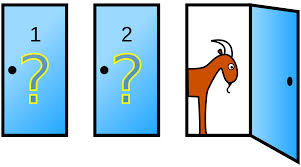

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [1]:
#your work here

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def sim_monty_hall():
    # Defining 3 options
    choice_options = np.arange(1,4)

    # Randomly assign the car to a door
    car_door = np.random.choice(choice_options)
    #print("Car door: ", car_door)

    # Randomly choose a door
    choice1 = np.random.choice(choice_options)
    #print("Choice 1: ",choice1)

    # Door to open
    doors_available = list(set(choice_options) - set([car_door, choice1]))
    door_open = np.random.choice(doors_available)
    #print("Open door: ", door_open)

    # Changing decision
    choice2 = list(set(choice_options) - set([choice1,door_open]))[0]

    # Wins with different strategies
    win1 = 1 if choice1==car_door else 0 #Non switching
    win2 = 1 if choice2==car_door else 0 #Switching

    return win1, win2


In [9]:
n_sim=1000
wins_switch = []
wins_notswitch =[]
for i in range(n_sim):
    sim_notswitch, sim_switch = sim_monty_hall()
    wins_switch.append(sim_switch)
    wins_notswitch.append(sim_notswitch)

In [10]:
wins_switch_acum = np.cumsum(wins_switch)
prob_switch_acum = wins_switch_acum/np.arange(1,n_sim+1)

In [11]:
wins_notswitch_acum = np.cumsum(wins_notswitch)
prob_notswitch_acum = wins_notswitch_acum/np.arange(1,n_sim+1)

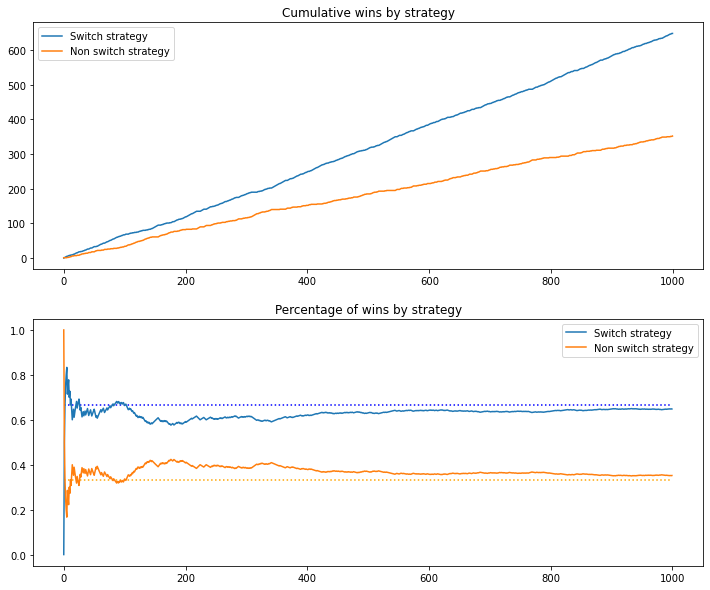

In [12]:
fig, axs = plt.subplots(2, figsize=(12, 10))
axs[0].plot(wins_switch_acum, label='Switch strategy')
axs[0].plot(wins_notswitch_acum, label='Non switch strategy')
axs[0].set_title('Cumulative wins by strategy')
axs[1].plot(prob_switch_acum, label='Switch strategy')
axs[1].plot(prob_notswitch_acum, label='Non switch strategy')
axs[1].hlines(y = 2/3,xmin=0, xmax=1000, ls=':', colors='blue')
axs[1].hlines(y = 1/3,xmin=0, xmax=1000, ls=':', colors='orange')
axs[1].set_title('Percentage of wins by strategy')
axs[0].legend()
axs[1].legend()
plt.show()

In the simulation we can see that the switching strategy is better than the not switching strategy. If we calculate the frequency (lower plot), it is clear that the switching strategy converges to $2/3$, and the non switching strategy converges to $1/3$.